In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
class DynamicNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_layer = nn.Linear(D_in, H)
        self.middle_layer = nn.Linear(H, H)
        self.output_layer = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = F.relu(self.input_layer(x))
        for _ in range(random.randint(0,4)):
            x = F.relu(self.middle_layer(x))
        y = self.output_layer(x)
        return y

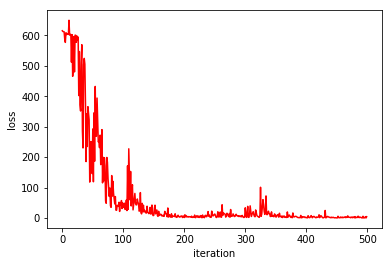

In [3]:
import matplotlib.pyplot as plt

N, D_in, D_out, H = 64, 1000, 10, 100

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = DynamicNet(D_in, H, D_out)

criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum = 0.9)

fig = plt.figure()
losses = list()
for t in range(500):
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

t = list(t for t in range(500))
plt.plot(t, losses, 'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()